데이터 실수화(Data Vectorization)
  - 범주형, 텍스트, 이미지 자료 등을 실수로 변환하는 거

In [1]:
#범주형 자료의 수량화

x = [{'city':'Seoul', 'temp':10.0}, {'city':'Dubai', 'temp':20.0}, {'city':'Egypt', 'temp':30.0}]
x

[{'city': 'Seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 20.0},
 {'city': 'Egypt', 'temp': 30.0}]

 - one-hot-coding을 이용해서 데이터 실수화 하기
 
 one-hot-coding : 범주형 자료형을 실수화 할 수 있음
 (sklearn.feature_extraction import DictVectorize)

 sparse = True :  희소행렬으로 표현하지 않음
 sparse = Flase : 행렬로 표현함


 COO, CSR 표현식
  - CSR이 메모리가 적게 들고, 빠른 연산이 가능함(sparse = true)

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False) 
vec.fit_transform(x)

array([[ 0.,  0.,  1., 10.],
       [ 1.,  0.,  0., 20.],
       [ 0.,  1.,  0., 30.]])

In [7]:
vec1 = DictVectorizer(sparse=True)
x1 = vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [9]:
x1.toarray()
vec1.get_feature_names()

['city=Dubai', 'city=Egypt', 'city=Seoul', 'temp']

# 텍스트 자료의 실수화
- 단어의 출현 횟수를 이용한 데이터 실수화

sklearn.feature_extraction.text import CountVectorizer

TF-IDF(term frequency inverse document frequency)
 - 자주 등장하여 분석에 의미 두지 못하는 단어의 중요도를 낮추는 기법 (ex : a, the)

In [10]:
text = ['떴다 떴다 비행기 날아라 날아라',
        '높이 높이 날아라 우리 비행기',
        '내가 만든 비행기 날아라 날아라',
        '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer() #default는 sparse=True
t = vec2.fit_transform(text).toarray() #text를 수량화해서, 배열로 나타내고
import pandas as pd
t1 = pd.DataFrame(t, columns = vec2.get_feature_names()) #Data Frame으로 나타냄
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfid = TfidfVectorizer() #높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치(TF-IDF 사용)
x2 = tfid.fit_transform(text).toarray()
x3 = pd.DataFrame(x2, columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


# 데이터 변환(Data Transformation)
 - 머신러닝은 데이터가 가진 특성들을 비교해서 패턴을 찾음
 - 데이터간 스케일이 크면 패턴을 찾는데 어려움이 있음

데이터 변환법
   - 표준화
   - 정규화 (더 유용)
   하지만 데이터 특성이 bell-shape이거나 이상치가 있으면 표준화가 더 유용

# 데이터 정제(Data Cleaning)

결측 데이터 채우기

 -결측 데이터 : nan, NaN, None

 -방법 : 평균, 중위수, 최빈수로

 -sklearn.impute import SimpleImputer()

 -sklearn의 dropna(), fillna() 도 있음

In [24]:
import numpy as np
x_miss = np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [29]:
#평균값으로 결측치 채우기
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy = 'mean')
im.fit(x_miss) #??????????????????????????????????????????



SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

# 데이터 통합(Data Integration)

여러 개의 데이터 파일을 하나로 합치는 과정

pandas의 merge()함수 사용

pandas의 df.dtypes -> 변수의 자료형 확인 가능


In [37]:
import pandas as pd
df1 = pd.read_csv("train.csv") #engine = 'python'
df2 = pd.read_csv("store.csv")


print(df1.shape)
print(df2.shape)
print(df1.head(5))
print(df2.head(5))


(1017209, 9)
(1115, 10)
   Store  DayOfWeek        Date  Sales  ...  Open  Promo  StateHoliday SchoolHoliday
0      1          5  2015-07-31   5263  ...     1      1             0             1
1      2          5  2015-07-31   6064  ...     1      1             0             1
2      3          5  2015-07-31   8314  ...     1      1             0             1
3      4          5  2015-07-31  13995  ...     1      1             0             1
4      5          5  2015-07-31   4822  ...     1      1             0             1

[5 rows x 9 columns]
   Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...             NaN              NaN
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...             NaN              NaN
4      5         a  ...             NaN              NaN

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
#두 개의 csv 합치기

df = pd.merge(df1, df2, on='Store')
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [42]:
df.shape

(1017209, 18)

In [43]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [48]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())


1115
942
5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64


# 데이터 불균형(Data Imbalance)
-> 머신러닝의 목적이 분류일 때, 특정 클래스의 관측치가 다른 클래스에 비해 매우 낮게 나타나면 불균형 자료라고 함

해소 기법
 1. 과소 표집(undersampling), 과대 표집(oversampling)  일반적으로 과대표집이 더 유용함
 2. 의사 결정 트리와 앙상블은 상대적으로 불균형 자료에 강인한 특성을 가짐

 과소 표집 : 다수 클래스의 표본을 임의로 학습 데이터로부터 제거
 과대 표집 : 소수 클래스의 표본을 복제하여 학습 데이터에 추가하는 거
  대표적인 방법 : SMOTE, ADASYN

In [108]:
#이게 뭔지 잘 모르겠어요!!!!!!!!!!!!!!!11
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# n_feature 변경, n_informative와 n_redundant 추가

x, y = make_classification(n_classes=3, weights=[0.03, 0.07, 0.9], n_features=2,
                          n_informative =2, n_redundant=0, n_clusters_per_class=1, n_samples=200, random_state=10)

print('original dataset shape %s' % Counter(y))


#informative + redundant + repeated < features
#classes + cluster_per_class < informative

original dataset shape Counter({2: 180, 1: 14, 0: 6})


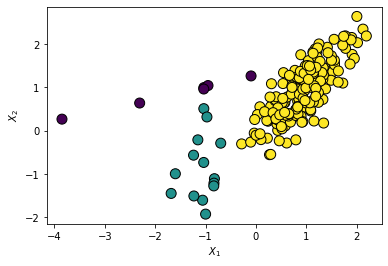

In [109]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=100, edgecolor='k')

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [110]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


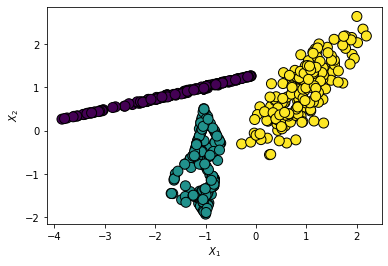

In [113]:
import matplotlib.pyplot as plt

plt.scatter(x_res[:, 0], x_res[:, 1], marker='o', c=y_res,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [114]:
ada = ADASYN(random_state=42)
x_syn, y_syn = ada.fit_resample(x,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


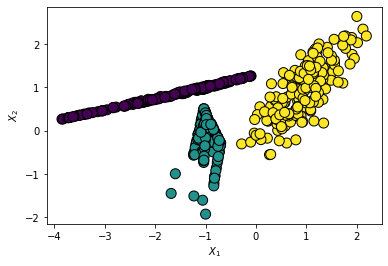

In [115]:
import matplotlib.pyplot as plt

plt.scatter(x_syn[:, 0], x_syn[:, 1], marker='o', c=y_syn,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [116]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=3, n_neighbors_ver3=3)
x_under, y_under = undersample.fit_resample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

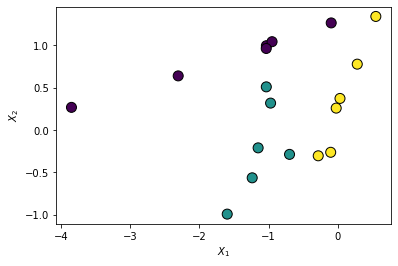

In [118]:
import matplotlib.pyplot as plt

plt.scatter(x_under[:, 0], x_under[:, 1], marker='o', c=y_under,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

 #under sampling 코드 실습